In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf

N: 432


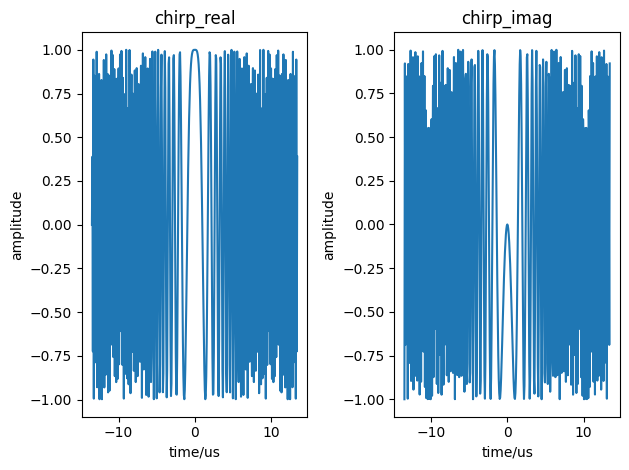

In [79]:
chirp_direction = -1
chirp_bandwidth = 1.4e+7
chirp_duration = 2.7e-5
chirp_slope = chirp_direction*chirp_bandwidth/chirp_duration
ADC_sampling_frequency = 1.600000e+07

t_interval = 1/ADC_sampling_frequency
N = int(chirp_duration/t_interval)
print('N:',N)
t_l = np.linspace(-chirp_duration/2,chirp_duration/2-t_interval,N)
x_chirp = np.exp(1j*np.pi*chirp_slope*(t_l**2),dtype=complex)
plt.figure()
plt.subplot(1,2,1)
plt.plot(t_l*1e+6,np.real(x_chirp))
plt.xlabel('time/us')
plt.ylabel('amplitude')
plt.title('chirp_real')
plt.subplot(1,2,2)
plt.plot(t_l*1e+6,np.imag(x_chirp))
plt.xlabel('time/us')
plt.ylabel('amplitude')
plt.title('chirp_imag')
plt.tight_layout()
plt.show()

0.005607641720263956
0.0 3.141592653589793
1e-10 3.141592653489793
complex128


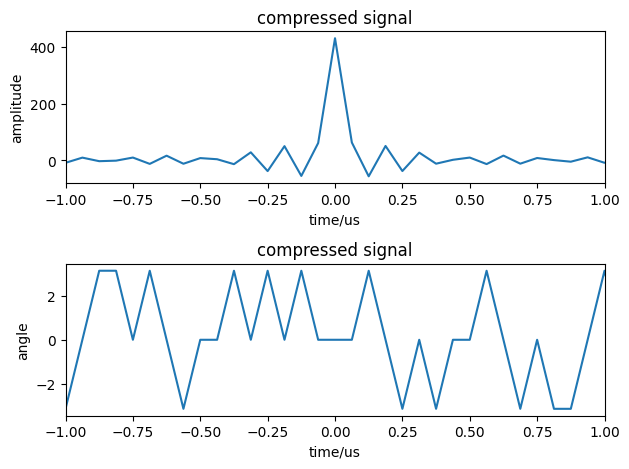

In [84]:
import math
h_m = np.exp(-1j*np.pi*chirp_slope*(t_l**2))
x_mf = ss.convolve(x_chirp,h_m)
t_0_idx = np.argmax(x_mf)
print(np.min(np.abs(x_mf[t_0_idx-int(N/2):t_0_idx+int(N/2)])))
plt.figure()
plt.subplot(2,1,1)
plt.plot(t_l*1e+6,np.real(x_mf[t_0_idx-int(N/2):t_0_idx+int(N/2)]))
plt.title('compressed signal')
plt.xlabel('time/us')
plt.ylabel('amplitude')
plt.xlim(-1,1)
plt.subplot(2,1,2)
plt.plot(t_l*1e+6,np.angle(x_mf[t_0_idx-int(N/2):t_0_idx+int(N/2)]))
plt.title('compressed signal')
plt.xlabel('time/us')
plt.ylabel('angle')
plt.xlim(-1,1)
plt.tight_layout()
print(np.angle(complex(1,1j*1e-10)),np.angle(complex(-1,1j*1e-10)))
print(np.angle(1+1j*1e-10),np.angle(-1+1j*1e-10))
print(x_mf.dtype)

432


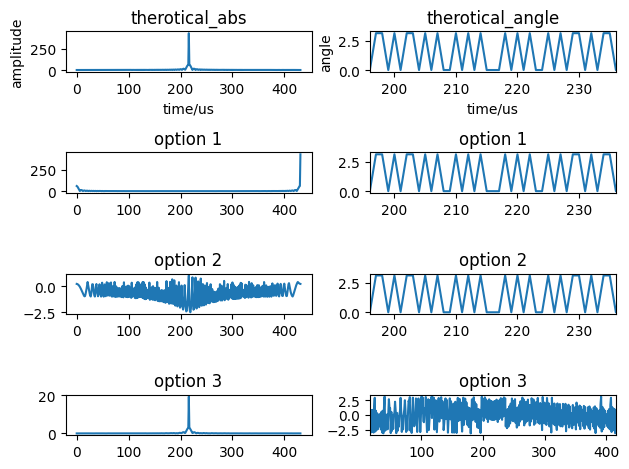

In [86]:
N_fft = N
t_0 = 0
x_chirp_shift = np.exp(1j*np.pi*chirp_slope*((t_l-t_0)**2))
x_chirp_fft = sf.fft(x_chirp_shift,N_fft)
x_chirp_fft_shift = np.fft.fftshift(x_chirp_fft)
# f_l = np.linspace(-ADC_sampling_frequency/2,ADC_sampling_frequency/2-ADC_sampling_frequency/N_fft,N_fft)
f_l = np.linspace(-ADC_sampling_frequency/2,ADC_sampling_frequency/2-ADC_sampling_frequency/N_fft,N_fft)
f_fft= np.fft.fftshift(sf.fftfreq(N_fft,t_interval))
f_l = f_fft
t_n = np.array(range(N_fft))
print(np.sum(np.equal(f_l,f_fft)))
plt.figure()

plt.subplot(4,2,1)
plt.plot(t_n,np.abs(x_mf[t_0_idx-int(N/2):t_0_idx+int(N/2)]))
plt.xlabel('time/us')
plt.ylabel('amplitude')
plt.title('therotical_abs')
plt.subplot(4,2,2)
plt.plot(t_n,np.angle(np.real(x_mf[t_0_idx-int(N/2):t_0_idx+int(N/2)])))
plt.xlabel('time/us')
plt.ylabel('angle')
plt.title('therotical_angle')
plt.xlim(int(N/2)-20,int(N/2)+20)
#option 1
plt.subplot(4,2,3)
h_1 = np.conjugate(np.flip(x_chirp_shift))
h_1_fft = sf.fft(h_1,N_fft)
x_1_mf = sf.ifft(x_chirp_fft*h_1_fft)
plt.plot(t_n,np.abs(x_1_mf))
plt.title('option 1')
plt.subplot(4,2,4)
plt.plot(t_n,np.roll(np.angle(np.real(x_1_mf)),int(N/2)+1))
plt.title('option 1')
plt.xlim(int(N/2)-20,int(N/2)+20)
#option 2
plt.subplot(4,2,5)
h_2 = x_chirp_shift
h_2_fft = np.conjugate(sf.fft(h_2,N_fft))
x_2_mf = sf.ifft(x_chirp_fft*h_2_fft)
plt.plot(t_n,np.roll(np.abs(x_2_mf),int(N/2))-np.abs(x_mf[t_0_idx-int(N/2):t_0_idx+int(N/2)]))
plt.title('option 2')
plt.subplot(4,2,6)
plt.plot(t_n,np.roll(np.angle(np.real(x_2_mf)),int(N/2)))
plt.title('option 2')
plt.xlim(int(N/2)-20,int(N/2)+20)
#option 3
plt.subplot(4,2,7)
# X(k) = X_0(k)*np.exp(-1j*2*np.pi*int(N/2)*k/N)
h_3_fft = np.exp(1j*np.pi/chirp_slope*((f_l)**2))
width = int(np.abs(chirp_slope*chirp_duration)/(ADC_sampling_frequency/N_fft)/2)
h_3_fft[0:int(N_fft/2)-width] = 0
h_3_fft[int(N_fft/2)+width:N_fft] = 0
# np.fft.fftshift 转化为fft默认形式
x_3_mf = sf.ifft(np.fft.fftshift(x_chirp_fft_shift*h_3_fft))
plt.plot(t_n,np.abs(x_3_mf))
plt.title('option 3')
plt.subplot(4,2,8)
plt.plot(t_n,np.angle(x_3_mf))
plt.title('option 3')
plt.xlim(int(N/2)-200,int(N/2)+200)
plt.tight_layout()